# Image manipulation

This notebook introduces some simple image manipulation techniques.


First, we do some setup work. This sets up autoreloading of code in external files and loads packages we need later.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

import matplotlib
from matplotlib import pyplot
import numpy as np
import duckietown_code_utils as dcu;
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


DEBUG:commons:version: 6.1.7 *
INFO:typing:version: 6.1.8
INFO:conf_tools:conf_tools 6.0.2


Populating the interactive namespace from numpy and matplotlib


## Loading and visualizing images

Here is a function that converts a JPEG image's bytes to a Numpy `nd.ndarray`.

In [2]:
fn = '../samples/big-duck/big-duck-08.jpg'
image1 = dcu.rgb_from_jpg_fn(fn)

We can see the shape with the attribute "shape":


In [3]:
image1.shape

(480, 640, 3)

Note that the convention is (height, width, depth). Here we have an image of height 480 and width 640. The depth represents R, G, B color channels.

Using `dtype` we can check the datatype for the image. In this cases, it is `uint8` (from 0 to 255)

In [4]:
image1.dtype

dtype('uint8')

We can display the image using `imshow()`.

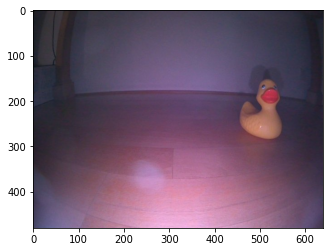

In [5]:
imshow(image1);


## Cropping images

You can manipulate the image by using multidimensional array notation.


For example, we can obtain a smaller image by cropping it.

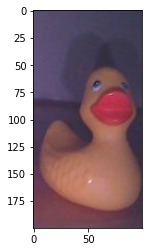

In [6]:
image1_cropped = image1[100:300, 450:550, :]
imshow(image1_cropped);

In the expression `image1[100:300, 450:550, :]` we selected a part of the image using slice notation. The notation `100:300` means taking the pixels from 100 to 300 in the first coordinate (vertical, starting from top); `450:550` means getting the pixels from 450 to 550 starting in the second coordinate (horizontal, starting from left).

We can also look at each component in isolation.

In [7]:
R = image1[:,:,0]
G = image1[:,:,1]
B = image1[:,:,2]

# stack them horizontally
R_G_B = np.hstack((R,G,B))

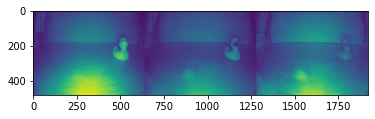

In [8]:
# Visualize
imshow(R_G_B);


We can also obtain a grayscale image using the `np.mean` function, by taking the mean around the last coordinate.


(480, 640)

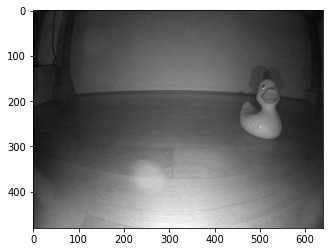

In [9]:
grayscale = np.mean(image1, axis=2)
imshow(grayscale, cmap='gray');
grayscale.shape

## Modifying the image

We can use array notation also to change the image.

For example, let's create a copy of the image and draw a line on it.

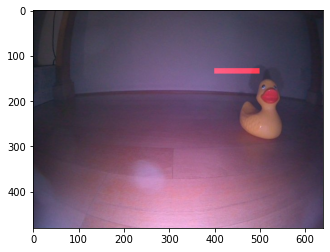

In [10]:
image1_copy = image1.copy()

image1_copy[128:140,400:500,0] = 255

imshow(image1_copy);

Note that when we used `image1_copy[128:140,400:500,0] = 255` we set to 255 a bunch of cells in the array. Specifically, those with first (vertical) coordinate 128 to 140 and with second (horizontal) coordinate 400 to 500. The 0 means that we set the first component: red.


Another example: we can make a yellow box as follows.


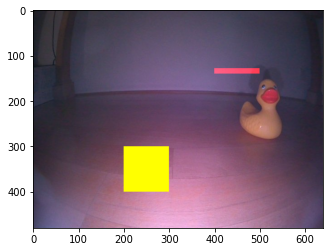

In [11]:
image1_copy[300:400,200:300,:] = (255,255,0)
imshow(image1_copy);

In this case, we selected with `[300:400,200:300,:]` all RGB components of those pixels (`:`) and we set them to yellow `(255,255,0)`.

## Activity

- Make another copy of the image (or load your own image).
- Draw a blue rectangle.
- Copy the upper right corner of the image and paste it to the lower-left corner.

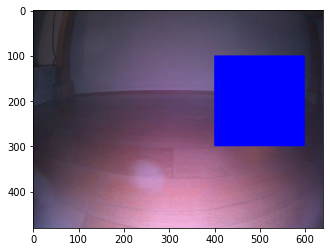

In [17]:
image1_copy2 = image1.copy()

image1_copy2[100:300,400:600,:] = (0,0,255)
imshow(image1_copy2);


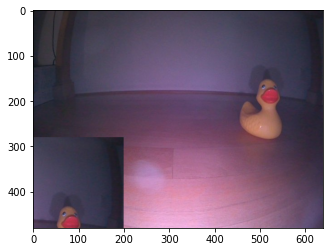

In [16]:
image1_copy3 = image1.copy()


image1_copy3[280:480,0:200,:]=image1_copy3[0:200,440:640,:]
imshow(image1_copy3);

----

Now go on to the [second notebook](braitenberg02.ipynb).